# Fertility data analysis

## Business Understanding

The questions that can be answered using the dataset are:

1. Does African countries have greater fertility rates
2. Which are the countries that have highest and lowest fertility rates
3. What are the trends of fertility rates in developed and developing countries? Is there a difference in trends?
4. Can you predict the fertility rate of a country given  53 years dataset?
5. How fertility rates are changing over the years?

In a world with evergrowing population knowing the trends of changing fertility rates is really vital as this is the major reason for the population changes.Therefore, to know how things are going to be in the future and to get an understanding about the changes in the demographics of the population study of fertility rates are crucial.This will help to prepare the population and take actions accordingly.

This project is purely taken out of curiosity to know more and the findings are observational and not an outcome of a formal study

In [2]:
'''Importing necessary libraries'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.metrics import r2_score

In [3]:
'''Load data to process'''

url = 'https://raw.githubusercontent.com/athira-g-96/Udacity-Project/main/Fertility-Rate.csv'
df = pd.read_csv(url, error_bad_lines=False)

## Data Understanding

In [4]:
print('Number of rows in the dataset (No: of countries):',df.shape[0])
print('Number of columns in the dataset:',df.shape[1])
df.head()

Number of rows in the dataset (No: of countries): 215
Number of columns in the dataset: 58


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,1.681,1.673
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,5.141,4.900
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,5.979,5.863
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,1.760,1.771


In [5]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,190.000000,191.000000,190.000000,189.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,...,198.000000,199.000000,201.000000,202.000000,201.000000,201.000000,200.000000,201.000000,200.000000,198.000000
mean,5.513968,5.493623,5.494189,5.490690,5.444001,5.396221,5.342911,5.299505,5.245774,5.193853,...,3.072545,3.043034,2.999641,2.966339,2.940569,2.909183,2.882285,2.856291,2.819192,2.796356
std,1.727203,1.745107,1.755098,1.755702,1.779992,1.810162,1.841084,1.850190,1.873676,1.893659,...,1.663280,1.633282,1.598629,1.564330,1.528533,1.503410,1.479790,1.451764,1.425548,1.403217
min,1.940000,1.940000,1.790000,1.820000,1.790000,1.740000,1.580000,1.800000,1.830000,1.870000,...,0.836000,0.849000,0.874000,0.906000,0.939000,0.973000,1.003000,1.031000,1.058000,1.083000
25%,4.209000,4.026500,4.123500,4.057000,3.950000,3.821000,3.644500,3.549000,3.394500,3.246500,...,1.780550,1.770100,1.800000,1.790000,1.788000,1.800000,1.808000,1.800000,1.766000,1.770250
50%,6.190000,6.151000,6.133500,6.116000,6.098500,6.093500,6.096500,6.010000,5.945000,5.838500,...,2.508000,2.496000,2.430000,2.422000,2.382000,2.374000,2.341500,2.322000,2.296000,2.283000
75%,6.806750,6.827500,6.834500,6.825000,6.827250,6.799750,6.797250,6.770000,6.738750,6.705000,...,4.052250,4.067500,3.941000,3.885250,3.755000,3.743000,3.735750,3.807000,3.626750,3.696750
max,8.187000,8.194000,8.197000,8.198000,8.198000,8.198000,8.198000,8.201000,8.207000,8.217000,...,7.636000,7.617000,7.602000,7.593000,7.588000,7.585000,7.584000,7.581000,7.574000,7.561000


In [4]:
print('No: of unique values in Indicator Name and Indicator Code columns:\n',
      'Indicator Name:',len(df['Indicator Name'].unique()),'\n',
      'Indicator Code:',len(df['Indicator Code'].unique()))

No: of unique values in Indicator Name and Indicator Code columns:
 Indicator Name: 1 
 Indicator Code: 1


In [21]:
null_list=df.columns[df.isnull().sum()>20]
print(null_list)

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1983', '1984', '1985', '1986', '1988',
       '1989', '1993', '1996'],
      dtype='object')


The dataset contains data of different countries given in 215 rows for the years from 1963 to 2013 in different columns. Fertiltiy rates are given from 1 to 10. By fertility rate it gives the total number of kids a mother will have. Out of 55 columns 2 only have 1 value in all rows.As both the columns have only one value there is no much use for these columns. There are null values in the dataset. For ease of analysis the trapose of the dataset can be taken so that country names are given as columns ans years as rows.

## Data Preparation

In [22]:
'''Dropping the unnecessary columns'''

df.drop(['Indicator Name','Indicator Code','Country Code'], axis = 1,inplace=True)
df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,1.681,1.673
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,5.141,4.900
3,Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,5.979,5.863
4,Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,1.760,1.771


In [23]:
'''Get transpose of the dataset to get different countries data as seperate 
columns so that this make analysis simpler'''

dt = df.transpose()
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,4.82,NaN,7.671,7.316,6.186,6.928,3.109,4.55,NaN,4.425,...,5.615,6.348,7.197,NaN,7.651,7.292,6.173,6.001,7.018,7.158
1961,4.655,NaN,7.671,7.354,6.076,6.91,3.1,4.512,NaN,4.386,...,5.651,6.392,7.12,NaN,7.645,7.308,6.144,6.015,7.071,7.215
1962,4.471,NaN,7.671,7.385,5.956,6.893,3.089,4.435,NaN,4.344,...,5.679,6.425,7.033,NaN,7.63,7.328,6.103,6.03,7.127,7.267
1963,4.271,NaN,7.671,7.41,5.833,6.877,3.078,4.317,NaN,4.299,...,5.696,6.448,6.938,NaN,7.604,7.354,6.049,6.048,7.184,7.311


In [24]:
dt.columns= df['Country Name'] # Change column names as country names
dt=dt.drop(['Country Name'],axis = 0) # Drop country name row from the dataset

dt.head()

Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,4.82,NaN,7.671,7.316,6.186,6.928,3.109,4.55,NaN,4.425,...,5.615,6.348,7.197,NaN,7.651,7.292,6.173,6.001,7.018,7.158
1961,4.655,NaN,7.671,7.354,6.076,6.91,3.1,4.512,NaN,4.386,...,5.651,6.392,7.12,NaN,7.645,7.308,6.144,6.015,7.071,7.215
1962,4.471,NaN,7.671,7.385,5.956,6.893,3.089,4.435,NaN,4.344,...,5.679,6.425,7.033,NaN,7.63,7.328,6.103,6.03,7.127,7.267
1963,4.271,NaN,7.671,7.41,5.833,6.877,3.078,4.317,NaN,4.299,...,5.696,6.448,6.938,NaN,7.604,7.354,6.049,6.048,7.184,7.311
1964,4.059,NaN,7.671,7.425,5.711,6.861,3.068,4.161,NaN,4.25,...,5.698,6.464,6.836,NaN,7.567,7.385,5.984,6.067,7.24,7.347


In [25]:
dt= dt.reset_index() # Convert year as another column 
dt = dt.rename(columns = {'index':'Year'})
dt.head()

Country Name,Year,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
0,1960,4.82,NaN,7.671,7.316,6.186,6.928,3.109,4.55,NaN,...,5.615,6.348,7.197,NaN,7.651,7.292,6.173,6.001,7.018,7.158
1,1961,4.655,NaN,7.671,7.354,6.076,6.91,3.1,4.512,NaN,...,5.651,6.392,7.12,NaN,7.645,7.308,6.144,6.015,7.071,7.215
2,1962,4.471,NaN,7.671,7.385,5.956,6.893,3.089,4.435,NaN,...,5.679,6.425,7.033,NaN,7.63,7.328,6.103,6.03,7.127,7.267
3,1963,4.271,NaN,7.671,7.41,5.833,6.877,3.078,4.317,NaN,...,5.696,6.448,6.938,NaN,7.604,7.354,6.049,6.048,7.184,7.311
4,1964,4.059,NaN,7.671,7.425,5.711,6.861,3.068,4.161,NaN,...,5.698,6.464,6.836,NaN,7.567,7.385,5.984,6.067,7.24,7.347


In [26]:
dt.dtypes

Country Name
Year                object
Aruba               object
Andorra             object
Afghanistan         object
Angola              object
                     ...  
Yemen, Rep.         object
South Africa        object
Congo, Dem. Rep.    object
Zambia              object
Zimbabwe            object
Length: 216, dtype: object

In [27]:
# Convert year datatype from object to integer

dt['Year'] = dt['Year'].apply(pd.to_numeric, downcast = 'integer',errors='coerce') 

In [28]:
# Convert all the remaining object datatypes to float 

cols=dt.columns[1:] 
dt[cols] = dt[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [29]:
dt.describe() # Get descriptive statistics of the dataset

Country Name,Year,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
count,54.000000,54.000000,5.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000,0.0,...,54.000000,54.000000,54.000000,24.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1986.500000,2.481592,1.216000,7.382833,7.016760,3.491778,4.526944,2.861741,2.55650,NaN,...,3.348890,4.099075,5.189722,5.273333,5.728982,7.305167,4.146000,6.605482,6.668334,5.728741
std,15.732133,0.806615,0.030496,0.722052,0.382652,1.376992,1.828982,0.390635,0.83481,NaN,...,1.356373,1.862230,1.100065,0.908892,1.220348,1.494324,1.297788,0.429602,0.613945,1.525880
min,1960.000000,1.673000,1.180000,4.900000,5.863000,1.741000,1.801000,2.175000,1.68400,NaN,...,1.770000,1.743000,3.382000,4.010000,4.147000,4.075000,2.387000,5.933000,5.687000,3.486000
25%,1973.250000,1.881750,1.190000,7.669000,6.852500,2.404000,2.674500,2.491500,1.73925,NaN,...,2.185500,2.001500,4.390750,4.452250,4.512500,6.415750,2.874250,6.221000,6.077750,4.079750
50%,1986.500000,2.313500,1.220000,7.671000,7.187500,3.151500,4.916500,3.048500,2.43100,NaN,...,2.979500,3.997000,5.109500,5.174000,5.457000,7.501500,4.114500,6.567500,6.705000,5.894000
75%,1999.750000,2.597750,1.240000,7.681750,7.208000,4.642250,6.245750,3.107750,2.91800,NaN,...,4.466750,6.219500,6.050000,6.151750,6.928750,8.496500,5.395750,7.004250,7.283750,7.325250
max,2013.000000,4.820000,1.250000,7.869000,7.430000,6.186000,6.928000,3.391000,4.55000,NaN,...,5.698000,6.494000,7.197000,6.548000,7.651000,9.223000,6.173000,7.267000,7.447000,7.420000


Fertility rate is given between 1 and 10.

In [30]:
# Get the list of countries with more than 75% empty (Nan) data 

null_list=dt.columns[dt.isnull().sum()/dt.shape[0] >=0.75]

dt[null_list].isnull().sum().sort_values(ascending=False)

Country Name
Taiwan, China                54
Northern Mariana Islands     54
American Samoa               54
Cayman Islands               54
Faeroe Islands               54
Tuvalu                       54
Monaco                       54
Turks and Caicos Islands     54
San Marino                   53
Palau                        51
Isle of Man                  51
Andorra                      49
Marshall Islands             48
St. Kitts and Nevis          48
Sint Maarten (Dutch part)    48
Dominica                     47
Curacao                      47
dtype: int64

We can drop these countries from the dataset as they donot contain enough datapoints (75% of the datapoints is Nan). 
The rest of the null values can be replaced by mean or median after analysis.

In [31]:
dt= dt.drop(columns=null_list,axis=1)
dt.shape

(54, 199)

In [32]:
dt.isnull().sum().sort_values(ascending=False)

Country Name
Liechtenstein    40
Bermuda          39
Serbia           34
Seychelles       33
Greenland        30
                 ..
Namibia           0
Malaysia          0
Malawi            0
Mauritius         0
Year              0
Length: 199, dtype: int64

In [33]:
dt=dt.set_index(["Year"]) # Set index as year so that we can seperate the dataset from year to input into KNNImputer
   
dt.head()

Country Name,Aruba,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,4.820,7.671,7.316,6.186,6.928,3.109,4.550,4.425,3.453,2.69,...,5.615,6.348,7.197,NaN,7.651,7.292,6.173,6.001,7.018,7.158
1961,4.655,7.671,7.354,6.076,6.910,3.100,4.512,4.386,3.540,2.78,...,5.651,6.392,7.120,NaN,7.645,7.308,6.144,6.015,7.071,7.215
1962,4.471,7.671,7.385,5.956,6.893,3.089,4.435,4.344,3.442,2.80,...,5.679,6.425,7.033,NaN,7.630,7.328,6.103,6.030,7.127,7.267
1963,4.271,7.671,7.410,5.833,6.877,3.078,4.317,4.299,3.332,2.82,...,5.696,6.448,6.938,NaN,7.604,7.354,6.049,6.048,7.184,7.311
1964,4.059,7.671,7.425,5.711,6.861,3.068,4.161,4.250,3.146,2.79,...,5.698,6.464,6.836,NaN,7.567,7.385,5.984,6.067,7.240,7.347


### Using KNNImputer to impute mean

In [34]:
x=np.array(dt.index)
x=x.reshape(-1,1)

In [35]:
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [36]:
def optimize_k(dt):
    '''input : Dataframe with Nan to impute mean 
    output : List of dictionaries with different k- values as Key and respective RMSE as values
    
    Function imputes mean to Nan values in the given dataset.
    KNNImputer is used with different k values from 1 to 25.
    RandomForestRegressor from scikit learn is used to predict values and thereby finding RMSE values.
    Get best k values and RMSE values'''
    
    errors = []
    for k in range(1, 25, 1):
        
        
        imputer = KNNImputer(n_neighbors=k,weights='distance')
        imputed = imputer.fit_transform(dt)
        
        df_imputed = pd.DataFrame(imputed, columns=dt.columns,index=dt.index)
    

        X = x
        y = np.array(df_imputed)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)
        
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [37]:
k_errors = optimize_k(dt)

print(k_errors)

[{'K': 1, 'RMSE': 0.060943188146767094}, {'K': 2, 'RMSE': 0.059506203480722}, {'K': 3, 'RMSE': 0.0595979755390393}, {'K': 4, 'RMSE': 0.05972186463413579}, {'K': 5, 'RMSE': 0.05982342849345664}, {'K': 6, 'RMSE': 0.05990506847183276}, {'K': 7, 'RMSE': 0.06005217594825427}, {'K': 8, 'RMSE': 0.06020010784086878}, {'K': 9, 'RMSE': 0.06033980251957622}, {'K': 10, 'RMSE': 0.060485323362459355}, {'K': 11, 'RMSE': 0.060609704082250186}, {'K': 12, 'RMSE': 0.06075416616250387}, {'K': 13, 'RMSE': 0.06088835801234887}, {'K': 14, 'RMSE': 0.06099011226820031}, {'K': 15, 'RMSE': 0.061105679323015825}, {'K': 16, 'RMSE': 0.06114002310529082}, {'K': 17, 'RMSE': 0.06124083387141493}, {'K': 18, 'RMSE': 0.06136036337784971}, {'K': 19, 'RMSE': 0.06144262969868434}, {'K': 20, 'RMSE': 0.061522665139085976}, {'K': 21, 'RMSE': 0.061569749433061684}, {'K': 22, 'RMSE': 0.0615819049473422}, {'K': 23, 'RMSE': 0.06159414191711626}, {'K': 24, 'RMSE': 0.06160666119476204}]


In [38]:
# Get k and errors in different lists

neighbor_values=[]
error=[]

for k in range(0,len(k_errors)):
    neighbor_values.append(k_errors[k]['K'])
    error.append(k_errors[k]['RMSE'])    

Text(0.5, 1.0, 'To get best k-value (n_neighbor)')

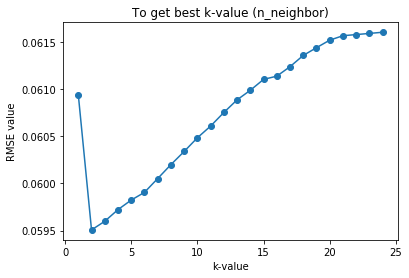

In [39]:
plt.plot(neighbor_values,error,marker='o')
plt.xlabel('k-value')
plt.ylabel('RMSE value')
plt.title('To get best k-value (n_neighbor)')

In [40]:
print('Min error value is %.3f' % np.min(error),'with k value :',2)

Min error value is 0.060 with k value : 2


In [41]:
#Impute Nanvalues using KNNImputer with k or neighbors as 2 

imputer = KNNImputer(n_neighbors=2,weights='distance')
dt_filled= imputer.fit_transform(dt)

dt_imputed = pd.DataFrame(dt_filled, columns=dt.columns,index=dt.index)

dt_imputed.head()

Country Name,Aruba,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,4.820,7.671,7.316,6.186,6.928,3.109,4.550,4.425,3.453,2.69,...,5.615,6.348,7.197,6.539877,7.651,7.292,6.173,6.001,7.018,7.158
1961,4.655,7.671,7.354,6.076,6.910,3.100,4.512,4.386,3.540,2.78,...,5.651,6.392,7.120,6.539886,7.645,7.308,6.144,6.015,7.071,7.215
1962,4.471,7.671,7.385,5.956,6.893,3.089,4.435,4.344,3.442,2.80,...,5.679,6.425,7.033,6.539874,7.630,7.328,6.103,6.030,7.127,7.267
1963,4.271,7.671,7.410,5.833,6.877,3.078,4.317,4.299,3.332,2.82,...,5.696,6.448,6.938,6.539870,7.604,7.354,6.049,6.048,7.184,7.311
1964,4.059,7.671,7.425,5.711,6.861,3.068,4.161,4.250,3.146,2.79,...,5.698,6.464,6.836,6.539865,7.567,7.385,5.984,6.067,7.240,7.347


In [42]:
dt_imputed.isnull().sum().sort_values(ascending=False)

Country Name
Zimbabwe         0
Guyana           0
Guatemala        0
Greenland        0
Grenada          0
                ..
Niger            0
New Caledonia    0
Namibia          0
Malaysia         0
Aruba            0
Length: 198, dtype: int64

 Data is cleaned and imputed with KNNImputer

## Data Modeling and Result Evaluation 

Code for data modeling and result evaluations for each of the questions is given under the heading of the respective questions

### 1. Does African countries have greater fertlity rates

#### Data Modeling

In [43]:
African_countries =['Madagascar','Ghana','Kenya','Mali','Nigeria',
                                            'Tanzania','Ethiopia','Morocco','Senegal','Uganda',
                                            'Somalia','Sudan','Angola','Namibia','Cameroon']
dt_imputed[African_countries].head()

Country Name,Madagascar,Ghana,Kenya,Mali,Nigeria,Tanzania,Ethiopia,Morocco,Senegal,Uganda,Somalia,Sudan,Angola,Namibia,Cameroon
Year,,,,,,,,,,,,,,,
1960,7.3,6.749,7.946,6.703,6.354,6.806,6.880,7.065,6.951,6.999,7.250,6.691,7.316,6.150,5.647
1961,7.3,6.789,7.998,6.725,6.351,6.806,6.877,7.106,6.994,7.019,7.252,6.713,7.354,6.167,5.705
1962,7.3,6.827,8.042,6.747,6.346,6.804,6.875,7.131,7.036,7.040,7.255,6.737,7.385,6.184,5.766
1963,7.3,6.862,8.078,6.770,6.341,6.803,6.872,7.135,7.075,7.060,7.258,6.762,7.410,6.199,5.828
1964,7.3,6.893,8.103,6.793,6.336,6.801,6.867,7.119,7.114,7.078,7.261,6.787,7.425,6.216,5.890


In [44]:
Asian_countries = ['China','India','Japan','Indonesia','Bangladesh','Pakistan',
                  'Afghanistan','Azerbaijan','Armenia']
dt_imputed[Asian_countries].head()

Country Name,China,India,Japan,Indonesia,Bangladesh,Pakistan,Afghanistan,Azerbaijan,Armenia
Year,,,,,,,,,
1960,5.758,5.870,2.001,5.666,6.725,6.6,7.671,5.571,4.550
1961,5.887,5.856,2.050,5.656,6.761,6.6,7.671,5.596,4.512
1962,6.008,5.842,2.010,5.645,6.794,6.6,7.671,5.591,4.435
1963,6.103,5.826,2.020,5.634,6.825,6.6,7.671,5.549,4.317
1964,6.157,5.807,2.050,5.623,6.853,6.6,7.671,5.468,4.161


In [45]:
European_countries =['Belgium','Germany','France','Finland','Croatia',
                     'Bulgaria','Greece','Denmark','Hungary','Ireland']
dt_imputed[European_countries].head()

Country Name,Belgium,Germany,France,Finland,Croatia,Bulgaria,Greece,Denmark,Hungary,Ireland
Year,,,,,,,,,,
1960,2.54,2.37,2.85,2.72,2.332,2.31,2.23,2.57,2.02,3.78
1961,2.63,2.45,2.87,2.72,2.302,2.29,2.13,2.55,1.94,3.78
1962,2.59,2.44,2.89,2.68,2.273,2.24,2.16,2.55,1.79,3.92
1963,2.68,2.51,2.89,2.68,2.243,2.21,2.14,2.67,1.82,4.01
1964,2.71,2.54,2.87,2.59,2.211,2.19,2.24,2.60,1.82,4.07


In [46]:
American_countries = ['Guatemala','Belize','Costa Rica','Mexico','Canada','United States','Panama',
                     'Brazil']
dt_imputed[American_countries].head()

Country Name,Guatemala,Belize,Costa Rica,Mexico,Canada,United States,Panama,Brazil
Year,,,,,,,,
1960,6.534,6.50,7.311,6.783,3.811,3.654,5.870,6.210
1961,6.512,6.48,7.295,6.776,3.753,3.620,5.846,6.190
1962,6.490,6.46,7.221,6.771,3.681,3.461,5.812,6.143
1963,6.464,6.44,7.085,6.768,3.607,3.319,5.765,6.063
1964,6.434,6.42,6.886,6.767,3.456,3.190,5.707,5.953


#### Visualisation

Text(0.5, 1.0, 'American Countries')

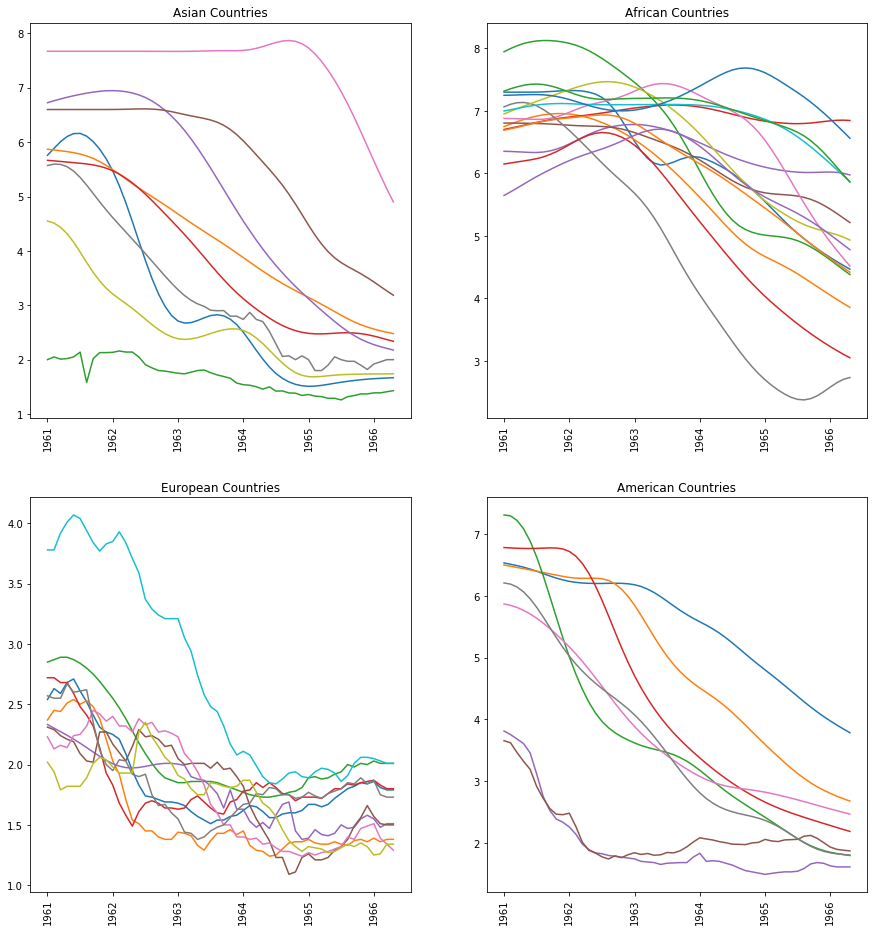

In [47]:
X =dt.index

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,16))
#fig.suptitle('Fertility rates of African countries over the years', fontsize=15)

ax1.plot(x,dt_imputed[Asian_countries] )
ax2.plot(x,dt_imputed[African_countries])
ax3.plot(x,dt_imputed[European_countries])
ax4.plot(x,dt_imputed[American_countries])

ax1.set_xticklabels(X, rotation=90)
ax2.set_xticklabels(X, rotation=90)
ax3.set_xticklabels(X, rotation=90)
ax4.set_xticklabels(X, rotation=90)

ax1.set_title("Asian Countries")
ax2.set_title("African Countries")
ax3.set_title("European Countries")
ax4.set_title("American Countries")


#### Result 

From the viaulisation obtained we can see that, even though all the countries(from all the continents) fertility rates are decreasing, African countries still have a greater fertility rate than the othere regions.
There is a large decline in fertility rates of European countries compared to other regions.

###  2. Which are the countries that have highest and lowest fertitlity rates

#### Data modeling

In [48]:
dt_imputed.describe()

Country Name,Aruba,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2.481592,7.382833,7.016760,3.491778,4.526944,2.861741,2.55650,2.664611,2.184833,1.760556,...,3.348890,4.099075,5.189722,5.976796,5.728982,7.305167,4.146000,6.605482,6.668334,5.728741
std,0.806615,0.722052,0.382652,1.376992,1.828982,0.390635,0.83481,0.815571,0.538190,0.494732,...,1.356373,1.862230,1.100065,0.872838,1.220348,1.494324,1.297788,0.429602,0.613945,1.525880
min,1.673000,4.900000,5.863000,1.741000,1.801000,2.175000,1.68400,2.058000,1.739000,1.330000,...,1.770000,1.743000,3.382000,4.010000,4.147000,4.075000,2.387000,5.933000,5.687000,3.486000
25%,1.881750,7.669000,6.852500,2.404000,2.674500,2.491500,1.73925,2.105250,1.840500,1.422500,...,2.185500,2.001500,4.390750,5.445750,4.512500,6.415750,2.874250,6.221000,6.077750,4.079750
50%,2.313500,7.671000,7.187500,3.151500,4.916500,3.048500,2.43100,2.242500,1.922000,1.505000,...,2.979500,3.997000,5.109500,6.539208,5.457000,7.501500,4.114500,6.567500,6.705000,5.894000
75%,2.597750,7.681750,7.208000,4.642250,6.245750,3.107750,2.91800,3.068500,2.467500,1.932500,...,4.466750,6.219500,6.050000,6.539793,6.928750,8.496500,5.395750,7.004250,7.283750,7.325250
max,4.820000,7.869000,7.430000,6.186000,6.928000,3.391000,4.55000,4.425000,3.540000,2.820000,...,5.698000,6.494000,7.197000,6.548000,7.651000,9.223000,6.173000,7.267000,7.447000,7.420000


In [49]:
print('Maximum mean value of fertility rate:',"%.3f" % np.max(dt_imputed.mean()),'\n Minimum mean value of fertility rate:',
 "%.3f" % np.min(dt_imputed.mean()))

Maximum mean value of fertility rate: 7.585 
 Minimum mean value of fertility rate: 1.533


#### Visualisation

Text(0.5, 1.0, 'Countries with average fertility rate greater than 7')

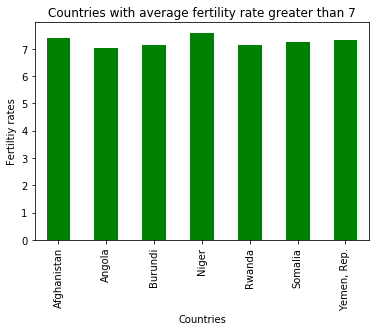

In [50]:
high=dt_imputed.columns[dt_imputed.mean()>=7]
dt_imputed[high].mean().plot(kind='bar',color = 'green')
plt.xlabel('Countries')
plt.ylabel('Fertiltiy rates')
plt.title('Countries with average fertility rate greater than 7')


Text(0.5, 1.0, 'Countries with average fertility rate less than 1.7')

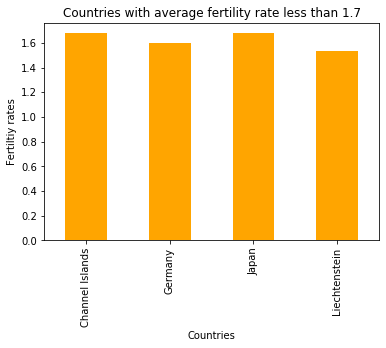

In [51]:
low=dt_imputed.columns[dt_imputed.mean()<1.7]
dt_imputed[low].mean().plot(kind='bar',color = 'orange')
plt.xlabel('Countries')
plt.ylabel('Fertiltiy rates')
plt.title('Countries with average fertility rate less than 1.7')


#### Results

After selection of the range of fertility values to look into to get the highest and lowest fertiltiy rates, visualisation was created to get the results.
By looking at the average value of fertility over the yers for each country in the dataset we get that,
'Niger' is the country with highest fertility rates and 'Liechtenstein' is the country with least fertility rates.

### 3.What are the trends of fertility rates in developed and developing countries? Is there a difference in trends?


#### Data modeling and visualisation

In [52]:
X =dt_imputed.index

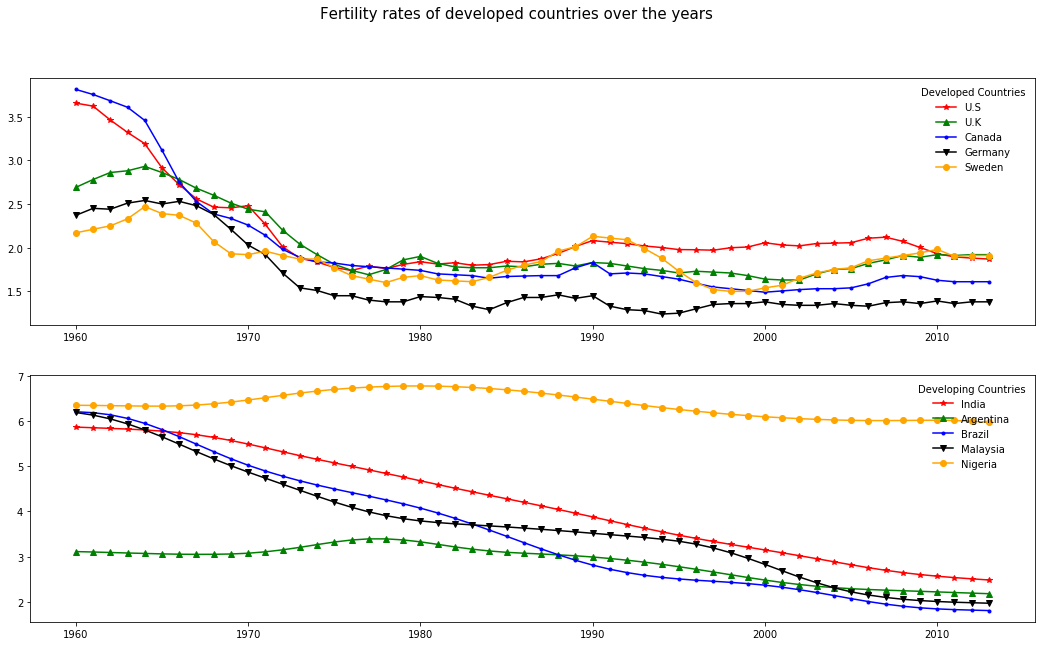

In [53]:
fig, ax = plt.subplots(2, figsize=(18, 10))

fig.suptitle('Fertility rates of developed countries over the years', fontsize=15)


ax[0].plot(X, dt_imputed['United States'], color="red", marker='*', label="U.S")
ax[0].plot(X, dt_imputed['United Kingdom'], color="green", marker='^', label="U.K")
ax[0].plot(X, dt_imputed['Canada'], color="blue", marker='.',label="Canada")
ax[0].plot(X, dt_imputed['Germany'], color="black",marker='v', label="Germany")
ax[0].plot(X, dt_imputed['Sweden'], color="orange",marker='o', label="Sweden")


ax[1].plot(X, dt_imputed['India'], color="red", marker='*', label="India")
ax[1].plot(X, dt_imputed['Argentina'], color="green", marker='^', label="Argentina")
ax[1].plot(X, dt_imputed['Brazil'], color="blue", marker='.', label="Brazil")
ax[1].plot(X, dt_imputed['Malaysia'], color="black",marker='v', label="Malaysia")
ax[1].plot(X, dt_imputed['Nigeria'], color="orange",marker='o', label="Nigeria")

ax[0].legend(loc="upper right", title="Developed Countries", frameon=False)
ax[1].legend(loc="upper right", title="Developing Countries", frameon=False)

plt.show()

Fertility rates of five developed and developing countries are taken to study the trends in both classes.

It can be seen that the fertility rates of developing countries are much greater than that of developed countries.

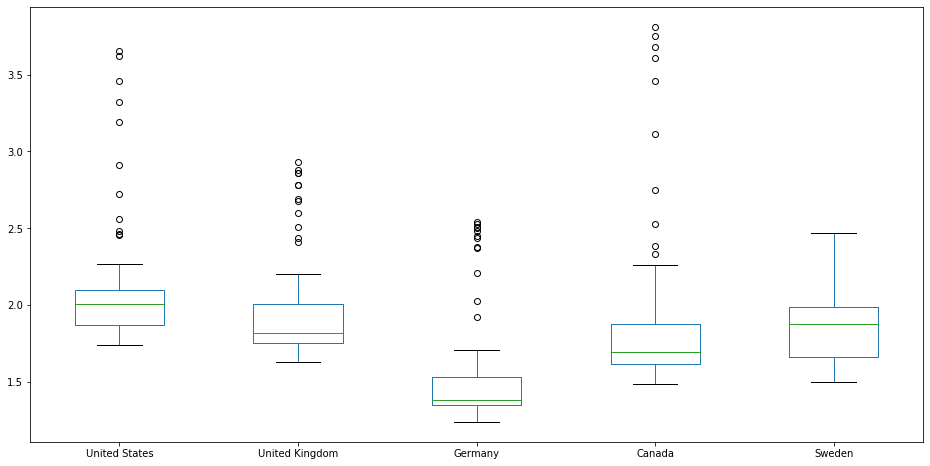

In [54]:
developed = ['United States','United Kingdom','Germany','Canada','Sweden']
dt[developed].plot(kind='box', figsize=[16,8])

#### To analyse the outliers of the data

In [55]:
Z= []
for country in developed:
    z=np.abs(stats.zscore(dt_imputed[country]))
    #print(z)
    for i in z:
        if i >=3:
            Z.append({'Country':country,'z':i})
    
print(Z)

[{'Country': 'United States', 'z': 3.129738}, {'Country': 'United States', 'z': 3.0585787}]


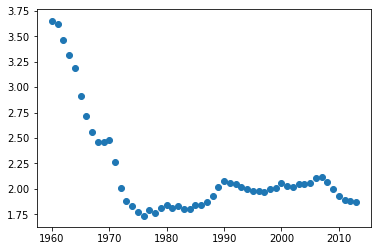

In [56]:
plt.scatter(dt_imputed.index,dt_imputed['United States'])

As per z-score calculations, it is clear that other than two data points in US dataset all the other datapoints lie within 3 standard deviations. The other countries show outliers in boxplots this might be due to small IQR of the dataset. Fertility rates of US have very small IQR with variation from 3.65 to 1.870.

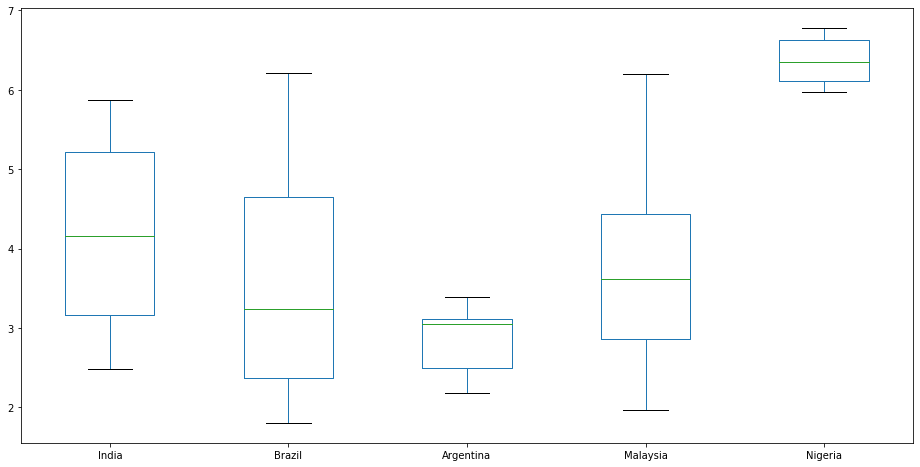

In [57]:
developing = ['India','Brazil','Argentina','Malaysia','Nigeria']
dt[developing].plot(kind='box', figsize=[16,8])

#### Results

By looking into the patterns obtained through visualisations we get the following results

As we can see Nigeria has the highest fertility rated in developing countries and Sweden has better fertility rates in case of developed countries. Fertility rates of developed countries varies within limits 1 to 4 while in case of developing countries it is distributed from 2 to 7.

### 4. Can you predict the fertility rates given 53 years fertility rates of the countries


#### Data modeling

Predict the fertility values of United Kingdom

Two models were created and evalueated to select the best model for prediction.
 * Linear Regression
 * Random Forest Regressor

In [58]:
X = np.array(dt_imputed.index)
X = X.reshape(-1,1)
#print(X)

In [59]:
Y= np.array(dt_imputed['United Kingdom'])
#print(Y)

### Linear Regression model and evaluation

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

lr = LinearRegression()
print(lr)
lr.fit(X_train, y_train)

yhat_test = lr.predict(X_test)
yhat_train = lr.predict(X_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [61]:
print('R-Squared of training data :', r2_score(y_train, yhat_train))
print('R-Squared of testing data :', r2_score(y_test, yhat_test))

R-Squared of training data : 0.5724076663555275
R-Squared of testing data : 0.3127550279848642


In [62]:
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

print('RMSE of linear regression model:',rmse(y_test,yhat_test))

RMSE of linear regression model: 0.33044622540819324


#### Visualisation

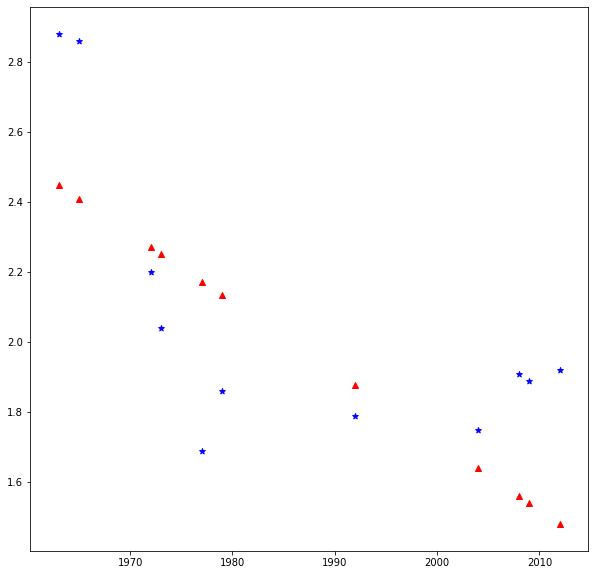

In [63]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.scatter(X_test,y_test, color="blue", marker='*', label="actual")
ax.scatter(X_test,yhat_test, color="red", marker='^', label="predicted")
plt.show()

### Random Regression model and evaluation

In [64]:
model = RandomForestRegressor(n_estimators=1000,random_state=42,max_depth=3) #print(model)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)
        

In [65]:
print('R square of training data:',r2_score(y_train,pred_train))
print('R square of testing data:',r2_score(y_test,pred_test))

R square of training data: 0.9886091470177345
R square of testing data: 0.9631934454726494


In [66]:
print('RMSE of linear regression model:',rmse(y_test,pred_test))

RMSE of linear regression model: 0.07647290572303918


#### Visualisation

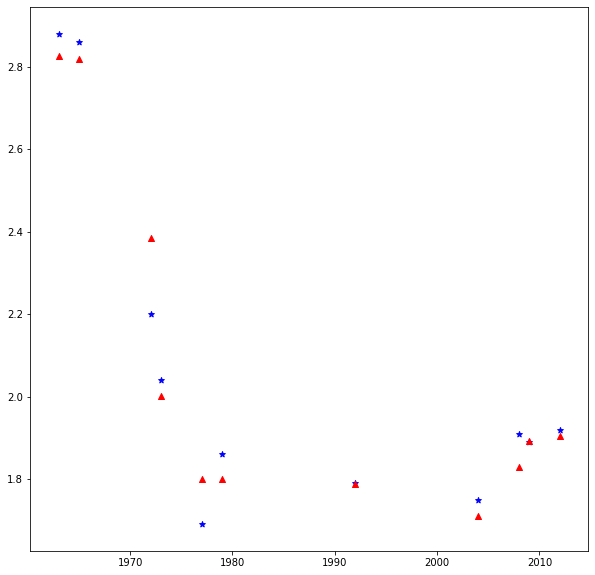

In [67]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.scatter(X_test,y_test, color="blue", marker='*', label="actual")
ax.scatter(X_test,pred_test, color="red", marker='^', label="predicted")
plt.show()

#### Results

Taking linear regression and random forest regression into consideration, it is clear that random forest regression is the best model for the dataset as R-square values of both test set and training set in this model is high. 

Therefore Random forest regressor model can be used to predict fertility rate values of different countries by taking years as the x(independent variable) and fertility rates of particular country over the years as y (dependent variable) from the dataset provided.

## 5. How fertility rates are changing over the years?

To predict overall fertility rates from all the given countries, same model with independent variable as years and dependent variable as mean of all the countries fertiltiy rates each year can be used. 

In [68]:
x=np.array(dt_imputed.index)
x=x.reshape(-1, 1)
y= np.array(dt_imputed.mean(axis=1))
print(y.shape)

(54,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [70]:
print('Training set has',y_train.shape[0],'values and test set has',y_test.shape[0],'values.')

Training set has 43 values and test set has 11 values.


In [71]:
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

In [72]:
print('R square of training data:',r2_score(y_train,pred_train))
print('R square of testing data:',r2_score(y_test,pred_test))

R square of training data: 0.9979846668640784
R square of testing data: 0.9977790379029158


In [73]:
print('RMSE of linear regression model:',rmse(y_test,pred_test))

RMSE of linear regression model: 0.04595425776273461


## Visualisation

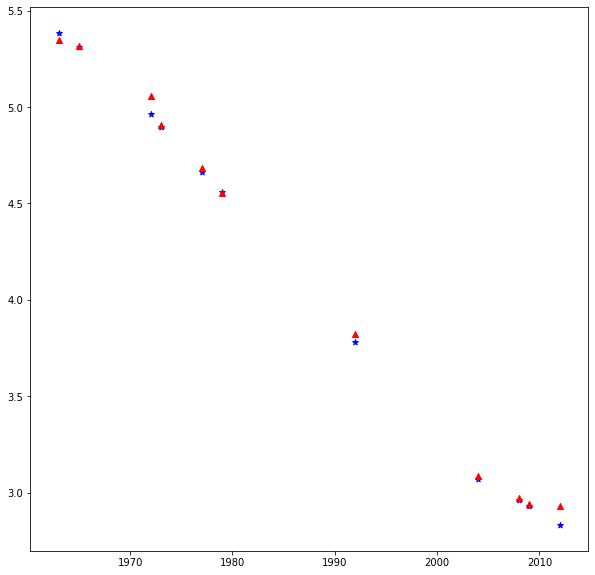

In [74]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.scatter(X_test,y_test, color="blue", marker='*', label="actual")
ax.scatter(X_test,pred_test, color="red", marker='^', label="predicted")
plt.show()

#### Results 

Therefore using the same regressor model, overall fertility changes or trends (taking average of fertility rates in an year) can be predicted.